## Курсовой проект по курсу "Интерпретируемый ИИ и майнинг данных"
### Часть 1: Работа с табличными данными
### Этап 1: EDA and Train Test Split

**Материалы к проекту (файлы):**
heart.csv

**Целевая переменная:**
HeartDisease: output class [1: heart disease, 0: Normal]

**Описание датасета:**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Атрибуты:**
1. Age: age of the patient [years] - **Возраст**
2. Sex: sex of the patient [M: Male, F: Female] - **Пол**
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] - **Тип боли в груди**
4. RestingBP: resting blood pressure [mm Hg] - **Артериальное давление в покое**
5. Cholesterol: serum cholesterol [mm/dl] - **Холестерин** 
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] - **Уровень сахара в крови натощак**
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] - **ЭКГ в покое**
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] - **Максимальная частота сердечных сокращений**
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No] - **Стенокардия, вызванная физической нагрузкой**
10. Oldpeak: oldpeak = ST [Numeric value measured in depression] - **ST в покое**
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] - **ST при пиковой нагрузке**
12. HeartDisease: output class [1: heart disease, 0: Normal] - **Сердечный приступ**

## Шаг 1: Подготовка инструментов

### 1.1 Необходимые модули

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xverse.transformer import WOE


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1.2 Загрузка данных

#### Загрузим данные и посмотрим основные статистики

In [2]:
DATASET_PATH = 'data/heart.csv'

In [3]:
df_base = pd.read_csv(DATASET_PATH)
df = df_base.copy()
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

#### Выводы:
* 918 объектов
* 11 признаков и 1 целевая переменная
* Пропусков в данных нет
* Дубликатов в данных нет
* Признаки разного типа


## Шаг 2: Анализ данных

### 2.1 Целевой признак

In [8]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

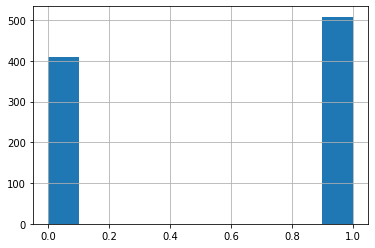

In [9]:
df['HeartDisease'].hist();

Есть небольшой дисбаланс - некритичный

In [10]:
disbalance = df['HeartDisease'].value_counts()[1] / df['HeartDisease'].value_counts()[0]
disbalance

1.2390243902439024

### 2.2 Анализ признаков

In [11]:
num_features = df.select_dtypes(include=[np.number]).columns.to_list()
cat_features = df.select_dtypes(include=[np.object]).columns.to_list()
print(f'Числовые признаки({len(num_features)}): {num_features}')
print(f'Категориальные признаки({len(cat_features)}): {cat_features}')

Числовые признаки(7): ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Категориальные признаки(5): ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


#### 2.2.1 Числовые признаки

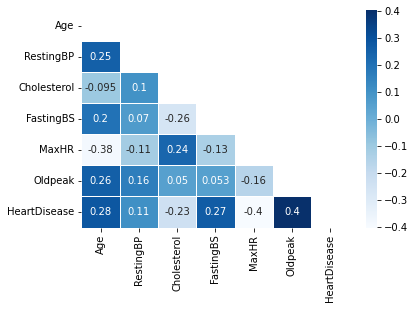

In [12]:
fig = plt.figure(figsize=(6,4)) 
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='Blues', annot=True, mask=mask, linewidth=0.5)
plt.show()

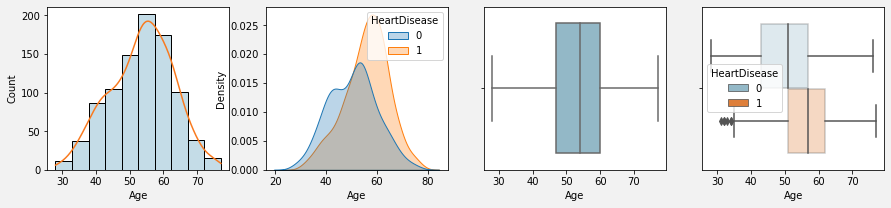

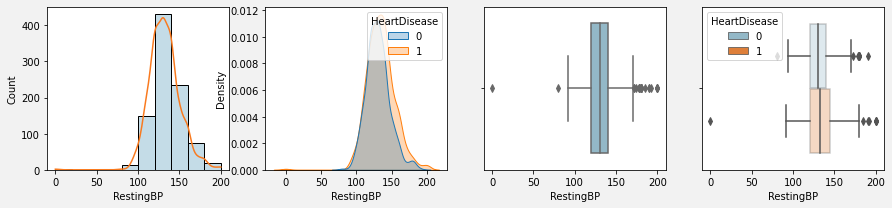

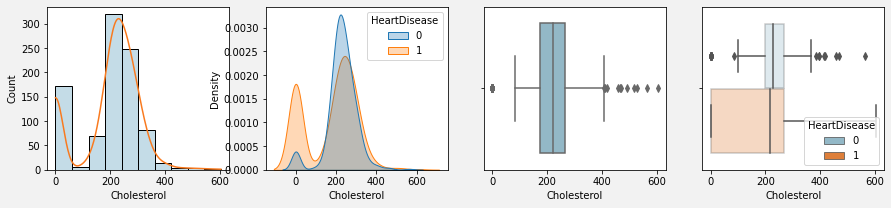

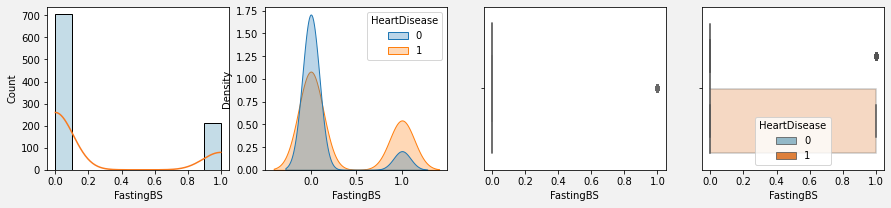

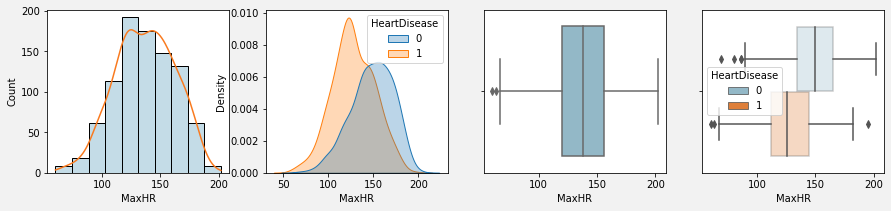

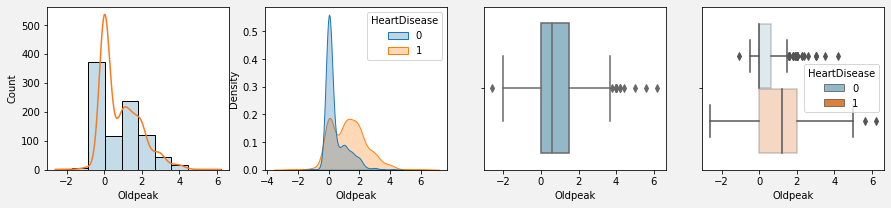

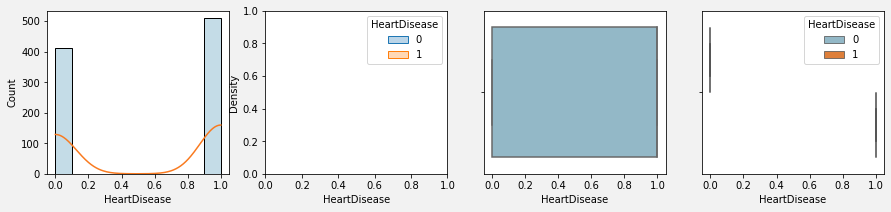

In [13]:
color ='#8abbd0'

for i in num_features:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(df[i], bins=10, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(x=i,data=df, hue='HeartDisease',ax=ax[1],shade=True, alpha=0.3)
    sns.boxplot(x=i, data=df,ax=ax[2], color=color)
    sns.boxplot(x=i, data=df, hue='HeartDisease',y=[""]*len(df),ax=ax[3],palette=['#8abbd0','#F97A1F'],boxprops=dict(alpha=.3))
    plt.tight_layout

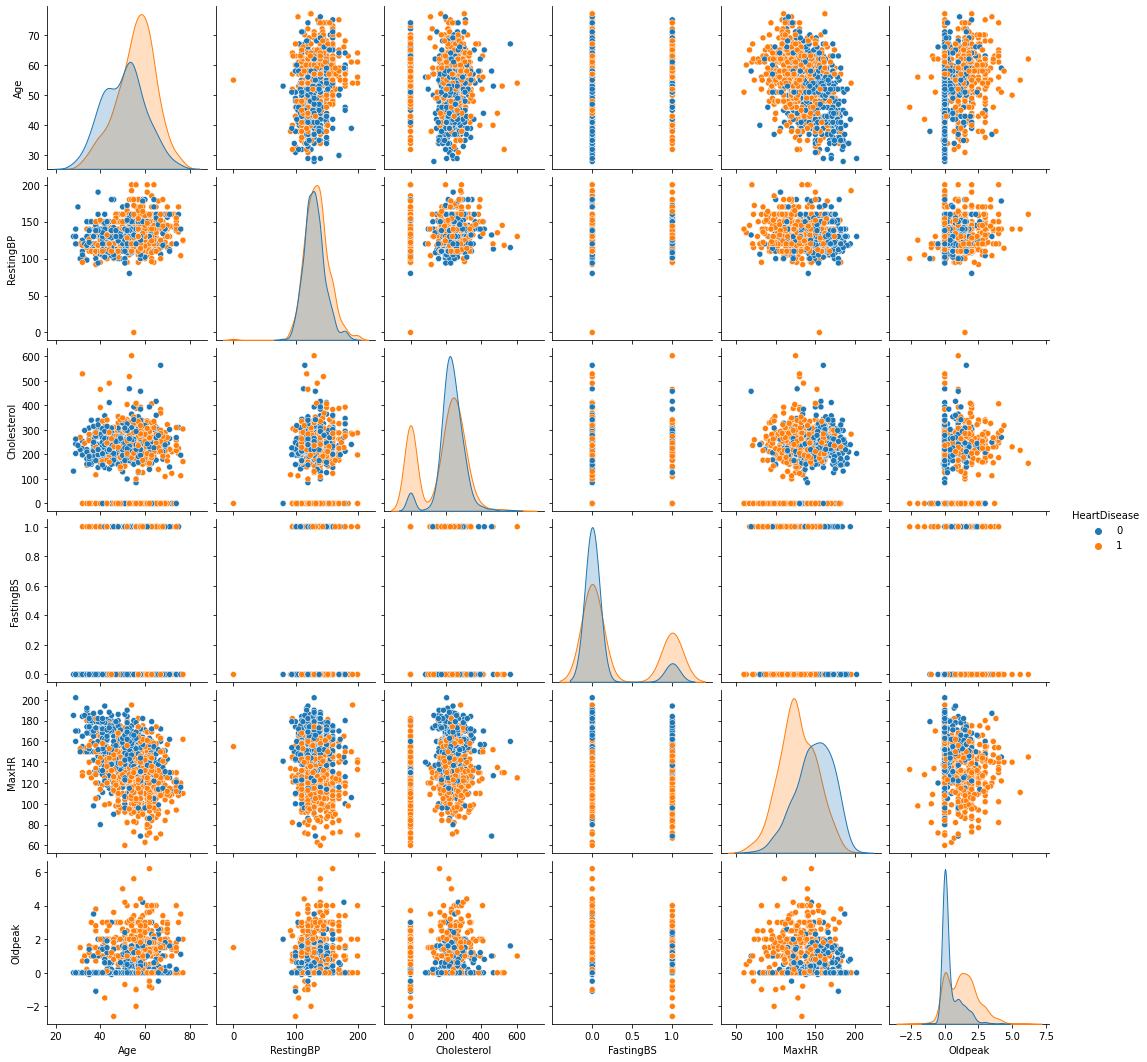

In [14]:
sns.pairplot(df[num_features], hue='HeartDisease');

#### Выводы:
Наиболее высокий шанс получить сердечный приступ:
* Age > 55
* FastingBS == Yes
* MaxHR < 150
* Oldpeak > 1

RestingBP имеет экстремальные выбросы в нуле.<br>
Cholesterol имеет много нулевых значений.<br>
Корреляция между признаками в целом невысокая.

#### 2.2.2 Категориальные признаки

In [15]:
print(len(cat_features), 'категориальных признаков:', "\n", cat_features, '\n')
for i in cat_features:
    unique_no = df[i].nunique()
    unique_name = df[i].unique().tolist()
    print('Признак', i, 'имеет', unique_no, 'уникальных значения:')
    print(unique_name, "\n")

5 категориальных признаков: 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

Признак Sex имеет 2 уникальных значения:
['M', 'F'] 

Признак ChestPainType имеет 4 уникальных значения:
['ATA', 'NAP', 'ASY', 'TA'] 

Признак RestingECG имеет 3 уникальных значения:
['Normal', 'ST', 'LVH'] 

Признак ExerciseAngina имеет 2 уникальных значения:
['N', 'Y'] 

Признак ST_Slope имеет 3 уникальных значения:
['Up', 'Flat', 'Down'] 



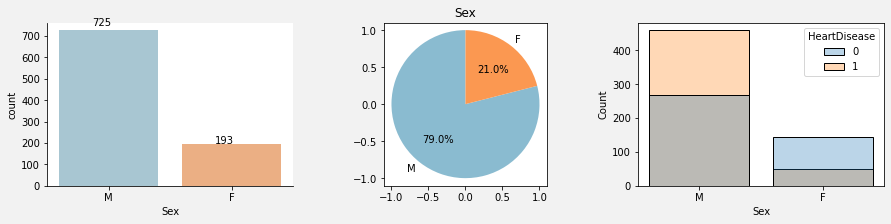

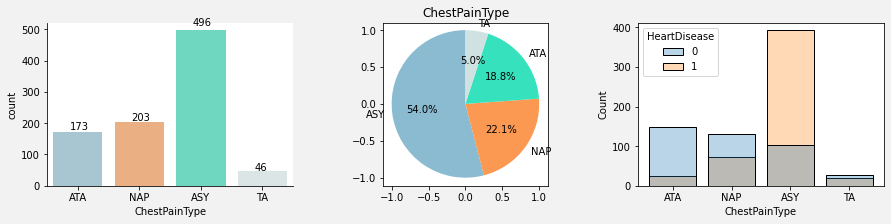

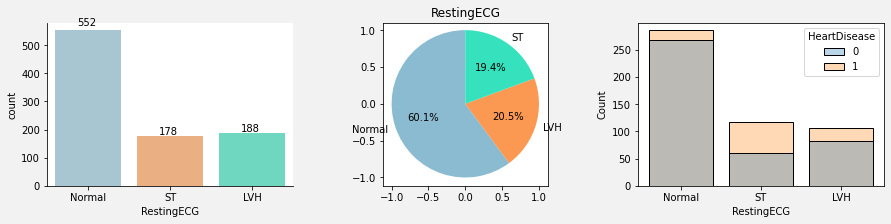

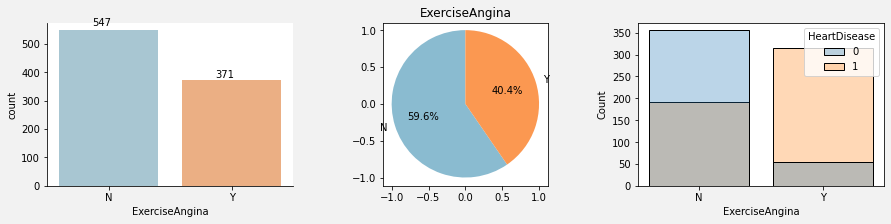

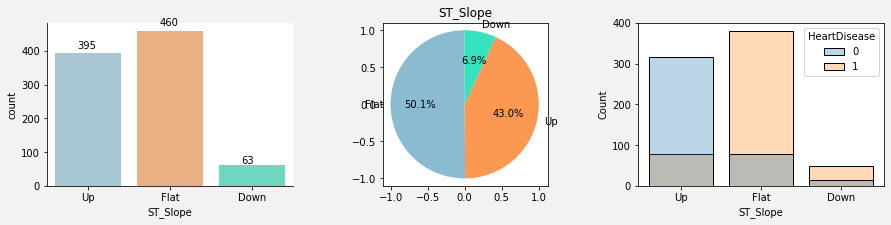

In [16]:
palette = ['#8abbd0', '#FB9851', '#36E2BD','#D0E1E1']

for feature in cat_features:
    fig, ax = plt.subplots(1,3, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(x=df[feature], data=df, ax=ax[0], palette=palette, alpha=0.8)
    for p, label in zip(ax[0].patches, df[feature].value_counts().index):
        ax[0].annotate(p.get_height(), (p.get_x()+p.get_width()/3, p.get_height()*1.03))
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
                    
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1], colors=palette, frame=True)
    ax[1].set_ylabel('')
    ax[1].set_title(feature)

    sns.histplot(x=feature,data=df, hue='HeartDisease',ax=ax[2], alpha=0.3, shrink=.8)  
    
    plt.tight_layout

#### Выводы:
Наиболее высокий шанс получить сердечный приступ:
* Sex == M
* ChestPainType == ASY
* ExerciseAngina == Y
* ST_Slope == Flat

#### 2.2.3 Анализ релевантности признаков

Корреляция с целевой переменной.

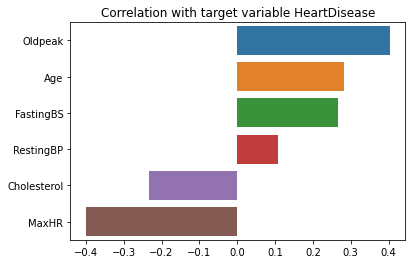

In [17]:
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable HeartDisease')
plt.show()

Корреляция с целевой переменной в целом невысокая. Самый большой положительный показатель у признака "Oldpeak", самый большой отрицательный показатель у признака "MaxHR".

Посчитаем WOE&IV для признаков

In [18]:
clf = WOE()
clf.fit(df.copy().drop(['HeartDisease'],axis=1), df['HeartDisease'].copy())

WOE(mono_custom_binning={'Age': array([28., 50., 58., 77.]),
                         'Cholesterol': array([  0., 197., 250., 603.]),
                         'FastingBS': array([0., 1.]),
                         'MaxHR': array([ 60., 125., 150., 202.]),
                         'Oldpeak': array([-2.6,  0. ,  1.2,  6.2]),
                         'RestingBP': array([  0., 123., 140., 200.])},
    woe_bins={'Age': {Interval(27.999, 50.0, closed='right'): -0.6382839786244573,
                      Interval(50.0, 58.0, closed='right'): 0.0159...
                            Interval(123.0, 140.0, closed='right'): -0.10680394416887218,
                            Interval(140.0, 200.0, closed='right'): 0.5478157641667682},
              'RestingECG': {'LVH': 0.04239555896768555,
                             'Normal': -0.1490837660117274,
                             'ST': 0.43697578274431653},
              'ST_Slope': {'Down': 1.0384386806152395,
                           'Flat': 1.35902

In [19]:
clf.iv_df

,Variable_Name,Information_Value
9,ST_Slope,1.823753
1,ChestPainType,1.377321
3,ExerciseAngina,1.152925
6,Oldpeak,0.732862
5,MaxHR,0.704523
10,Sex,0.398176
4,FastingBS,0.325352
0,Age,0.299233
2,Cholesterol,0.138346
7,RestingBP,0.091546


Довольно высокая важность у признаков "ST_Slope", "ChestPainType", "ExerciseAngina", "Oldpeak" и "MaxHR".<br>
Они оказывают наибольшее влияние на целевую переменную.

### 2.3 Выводы

В итоге получили, что Наиболее высокий шанс получить сердечный приступ имеют:<br>
* Age > 55
* FastingBS == Yes
* MaxHR < 150
* Oldpeak > 1
* Sex == M
* ChestPainType == ASY
* ExerciseAngina == Y
* ST_Slope == Flat

То есть, в среднем это мужчины старше 55 лет с повышенным сахаром в крови и максимальной частотой сердечных сокращений менее 150. При этом у них покатель ST на кардиограмме в покое более 1 и имеет тип flat при пиковой нагрузке. Также при физической нагрузке они страдают стенокардией. И важный показатель, что у таких людей приступы проходят бессимптомно, но оказывают при этом блокировку кровотока к сердцу и возможное повреждение сердечной мышцы.

## Шаг 3: Подготовка данных

### 3.1 Обработка выбросов

In [20]:
df.loc[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Выброс всего один, поэтому просто удалим его.

In [21]:
row = df[df['RestingBP']==0].index
df = df.drop(df.index[row])

### 3.2 Обработка нулевых значений

In [22]:
df.loc[df['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Холестерин не может быть равен нулю, поэтому заменим его медианным значением.

In [23]:
median_values = df['Cholesterol'].median()
row = df[df['Cholesterol']==0].index
df.loc[row, 'Cholesterol'] = median_values

### 3.3 Целевой признак

In [24]:
target_name = 'HeartDisease'
target = df[target_name]
df = df.drop([target_name], axis=1)

### 3.4 Разобьем данные на обучающую, тестовую и валидационную выборки:

In [25]:
(X, X_valid, y, y_valid) = train_test_split(df, target, test_size=0.1, random_state=0, stratify=target)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [26]:
print(f'Обучающая выборка: X_train:{X_train.shape}/y_train:{y_train.shape}')
print(f'Тестовая выборка: X_test:{X_test.shape}/y_test:{y_test.shape}')
print(f'Валидационная выборка: X_valid:{X_valid.shape}/y_valid:{y_valid.shape}')

Обучающая выборка: X_train:(577, 11)/y_train:(577,)
Тестовая выборка: X_test:(248, 11)/y_test:(248,)
Валидационная выборка: X_valid:(92, 11)/y_valid:(92,)


In [27]:
print(f'Полная выборка: df:{df.shape}/target:{target.shape}')

Полная выборка: df:(917, 11)/target:(917,)


### 3.5 Сохраним полученные выборки

In [28]:
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
X_valid.to_csv('data/X_valid.csv', index=False)
df.to_csv('data/X_full.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)
y_valid.to_csv('data/y_valid.csv', index=False)
target.to_csv('data/y_full.csv', index=False)